재활용 분석 시작...
재활용     150
사용       60
공장       40
배출       40
재활용품     40
자원       40
플라스틱     40
종이       40
쓰레기      40
원료       40
dtype: int64
재활용 분석 완료!


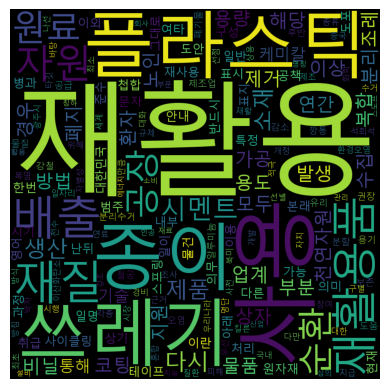

In [3]:
import requests
from bs4 import BeautifulSoup
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor, as_completed
import pandas as pd
from konlpy.tag import Okt

okt = Okt()

# 텍스트를 가져오는 함수
def get_text_from_page(keyword, page):
    session = requests.Session()
    url = f"https://search.naver.com/search.naver?where=view&sm=tab_jum&query={keyword}&start={page}"
    response = session.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    text = ' '.join([item.text for item in soup.select(".api_txt_lines")])
    if not text:
        url = f"https://search.naver.com/search.naver?where=view&sm=tab_jum&query={keyword}&start={page}"
        response = session.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        text = ' '.join([item.text for item in soup.select(".api_txt_lines")])
    return text

# 네이버에서 텍스트를 가져오는 함수
def get_text_from_naver(keyword, start=1, end=100):
    text = ""
    with ThreadPoolExecutor(max_workers=10) as executor:
        futures = [executor.submit(get_text_from_page, keyword, page) for page in range(start, end, 10)]
        for future in as_completed(futures):
            text += future.result()
    if not text:
        print(f"No text found for keyword: {keyword}")
    return text

# 텍스트를 분석하는 함수
def analyze_text(text, exclude_words):
    # OKT를 사용하여 텍스트에서 명사만 추출
    words = okt.nouns(text)
    word_counts = Counter(words)
    # 두 글자 이상인 단어만 추출하고 제외 단어 필터링
    word_counts = {word: count for word, count in word_counts.items() if len(word) > 1 and word not in exclude_words}
    word_list = pd.Series(word_counts).sort_values(ascending=False)
    print(word_list.head(10))  # 상위 10개의 단어 출력
    return word_counts

# 워드 클라우드를 시각화하는 함수
def visualize_word_cloud(word_counts, filename):
    if len(word_counts) > 0:
        wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
        gen = wc.generate_from_frequencies(word_counts)
        plt.figure()
        plt.imshow(gen)
        plt.axis('off')
        plt.savefig(filename, bbox_inches='tight')
    else:
        print(f"No words found for {filename}")

keywords = ['재활용', '친환경', '제로웨이스트']
exclude_words = {'단어1', '단어2', '단어3'}  # 제외할 단어 목록

for keyword in keywords:
    print(f"{keyword} 분석 시작...")
    text = get_text_from_naver(keyword)
    word_counts = analyze_text(text, exclude_words)  # exclude_words를 추가로 전달
    print(f"{keyword} 분석 완료!")
    visualize_word_cloud(word_counts, f"{keyword}_wordcloud.png")


mask 변환 방식 1


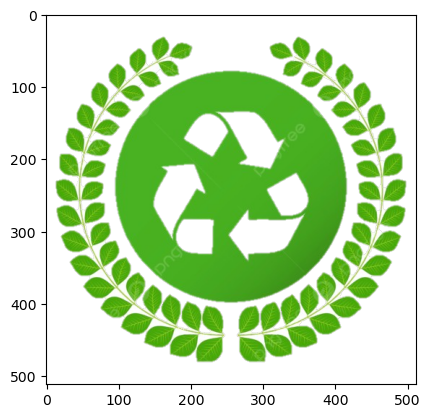

In [4]:
from PIL import Image
import numpy as np
from wordcloud import ImageColorGenerator

image_names = '그림2.png', '그림1.png', '그림3.png']


for image_name in image_names:
    target_image = Image.open(image_name)
    try:
        mask = Image.new('RGB', target_image.size, (255, 255, 255))
        mask.paste(target_image, target_image)
        mask = np.array(mask)
        print("mask 변환 방식 1")
    except:
        print(image_name)
        mask = np.array(Image.open(image_name))
        print("mask 변환 방식 2")
    finally:
        plt.imshow(target_image)
        plt.show()

In [5]:
# count = Counter(word_list)
font_path = 'NanumBarunGothic.ttf'

wc_rey = WordCloud(
    font_path = font_path,
    # mask=moon_mask,
    mask=mask,
    background_color="white"
)

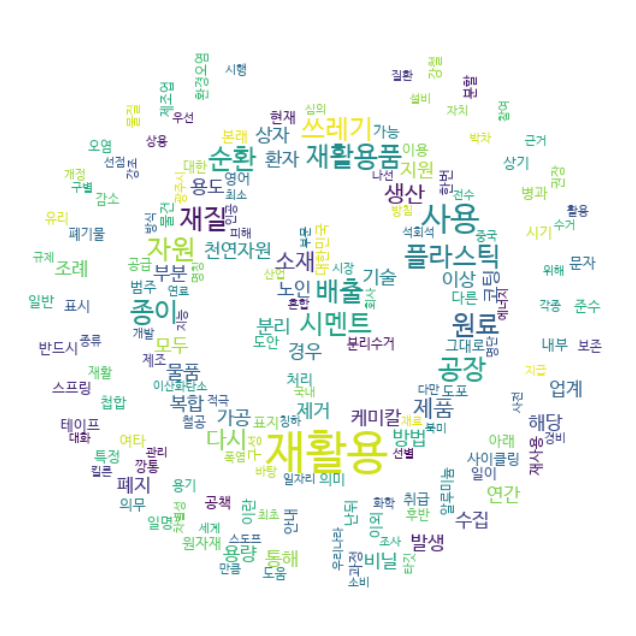

<Figure size 640x480 with 0 Axes>

In [6]:
wc_rey = wc_rey.generate_from_frequencies(word_counts)

plt.figure(figsize=(8, 8))
plt.imshow(wc_rey, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig(f"{keyword}_wordcloud.png", bbox_inches='tight')